# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

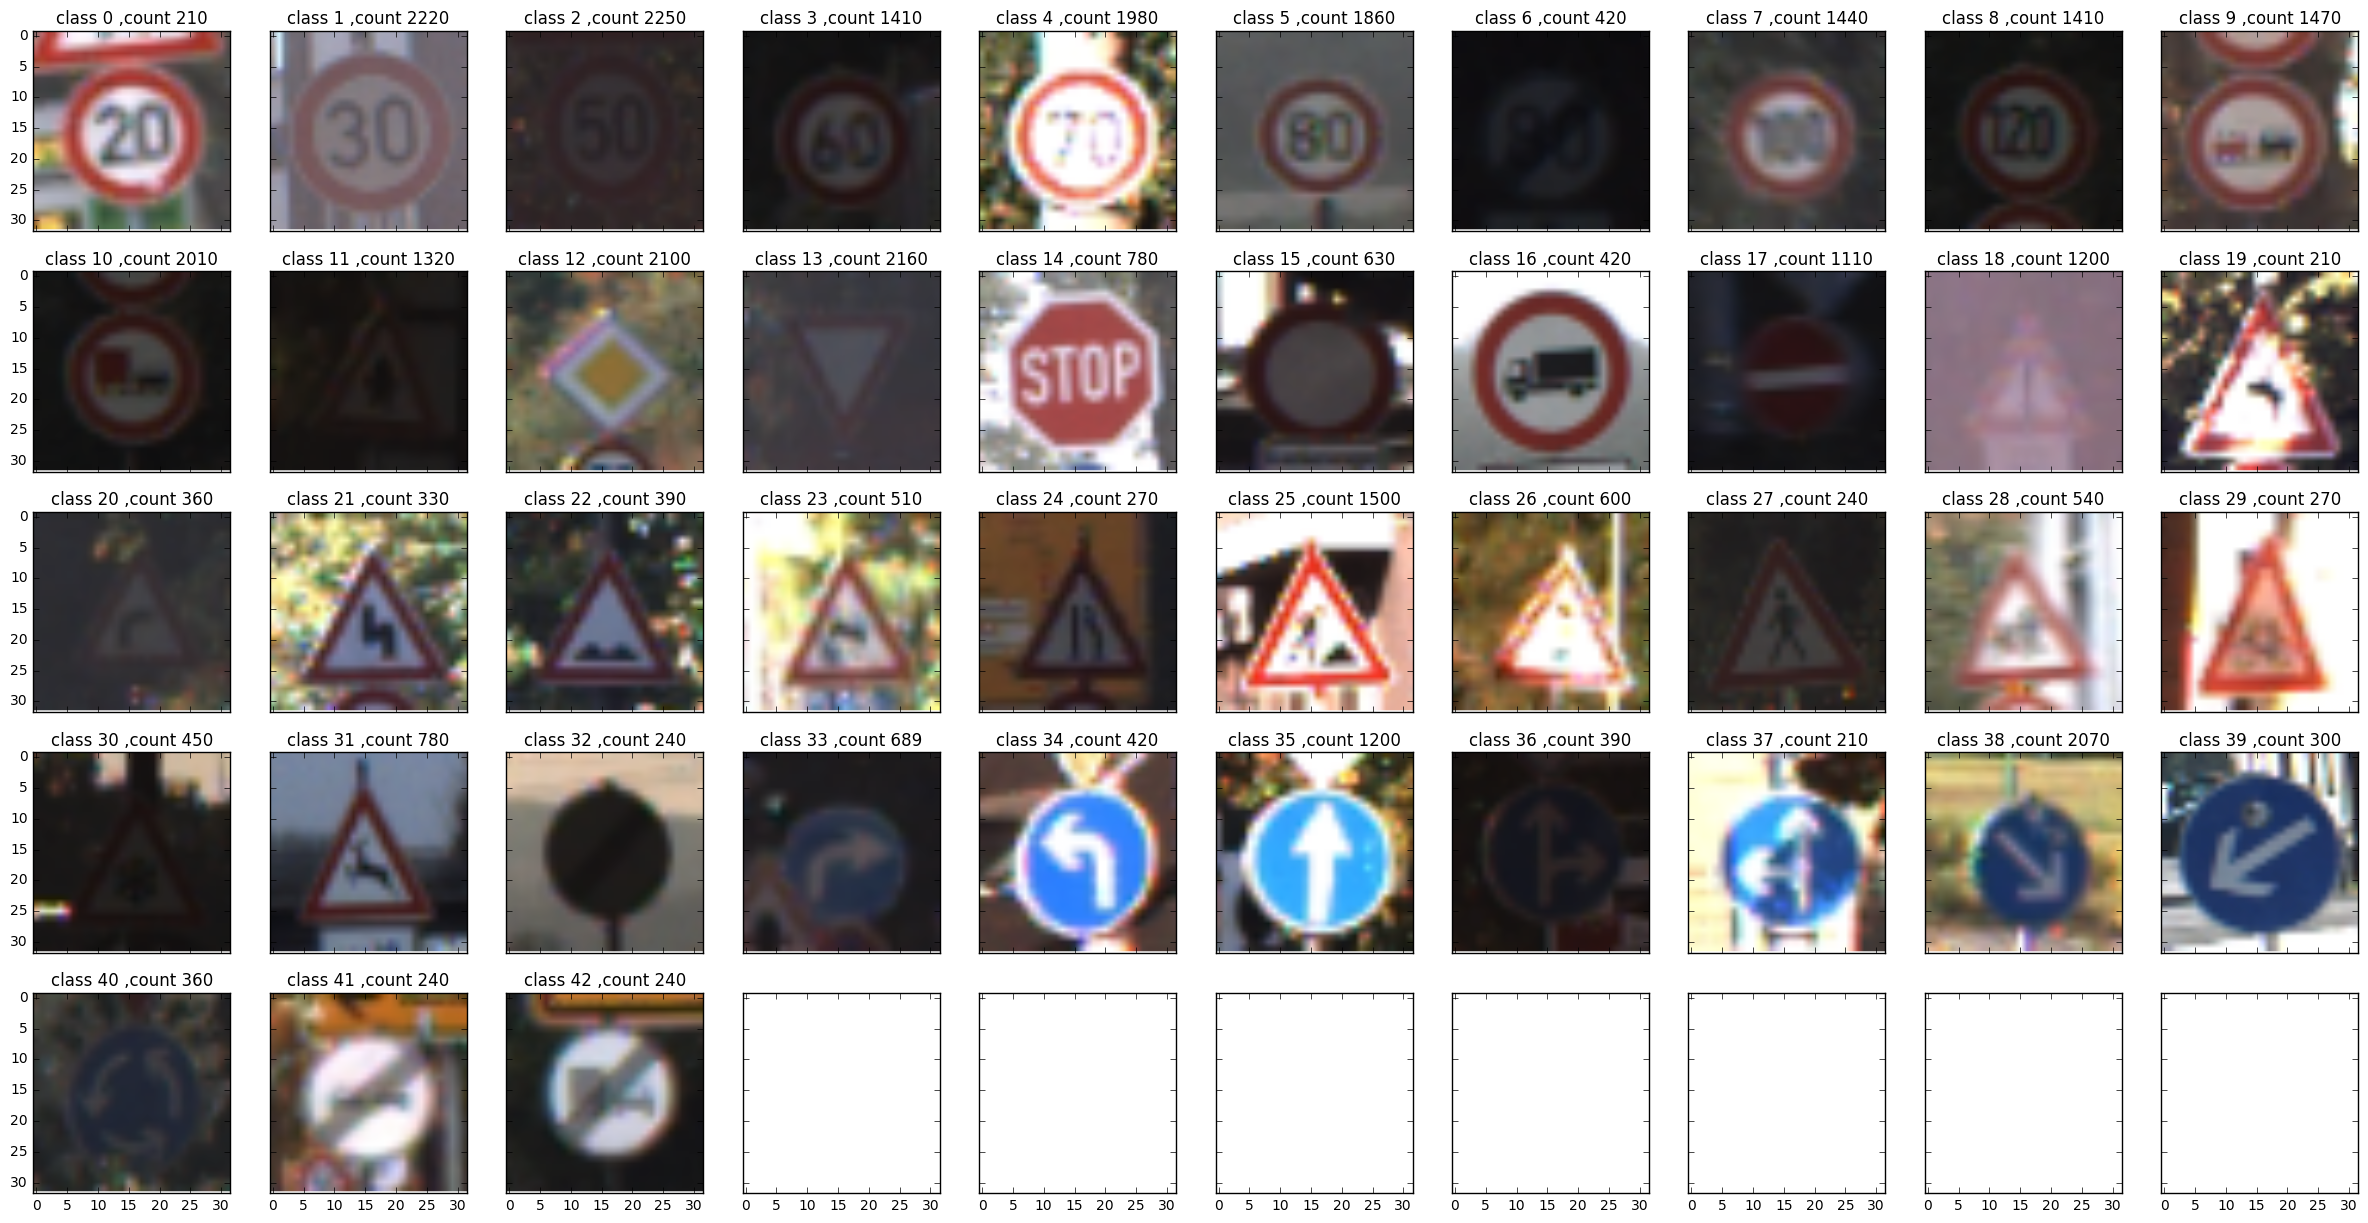

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

train_class_count = {}
for cl in range(n_classes):
    count = list ((y_train == cl) ).count(True) 
    train_class_count[cl] = count   
    
def plot_image(imageset,image_class,index_in_class , subp=plt):
    _index = list((np.where(y_train == image_class) )) [0][index_in_class]
    img = subp.imshow(imageset[_index] )
    subp.set_title('class ' + str(image_class) + ' ,count '  + str(train_class_count[image_class]) )
        
f , AXS = plt.subplots(5, 10, sharex='col', sharey='row' ,figsize=(30,15))

idx_in_class = 10

for class_number in range(10):
    plot_image(X_train,class_number,idx_in_class , AXS[0][class_number])
for class_number in range(10,20):
    plot_image(X_train,class_number,idx_in_class , AXS[1][class_number-10])    
for class_number in range(20,30):
    plot_image(X_train,class_number,idx_in_class , AXS[2][class_number-20])  
for class_number in range(30,40):
    plot_image(X_train,class_number,idx_in_class , AXS[3][class_number-30])  
for class_number in range(40,43):
    plot_image(X_train,class_number,idx_in_class , AXS[4][class_number-40]) 

Minimum number of training labels: 210
Maximum number of training labels: 2250
Average number of training labels: 911.837209302


<Container object of 43 artists>

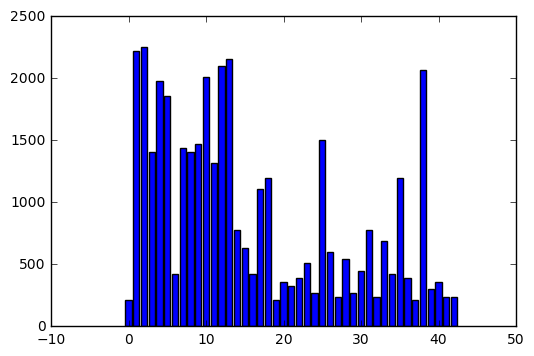

In [4]:
#
average_count = np.mean(list(train_class_count.values()) )
print("Minimum number of training labels:" , min(train_class_count.values()) )
print("Maximum number of training labels:" , max(train_class_count.values()) )
print("Average number of training labels:" ,  average_count)

plt.bar(range(len(train_class_count)), train_class_count.values(), align='center')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

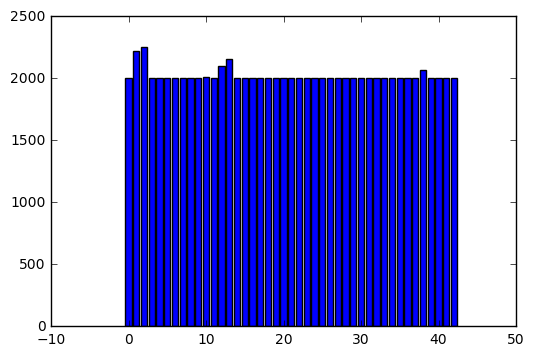

In [5]:
### Generate data additional data (OPTIONAL!)
import cv2
import math
import random

def generate_image(img):
    x = random.randint(1, 3)
    if x == 1:
        dst = cv2.blur(img,(1,1))
    elif x == 2:
        rows,cols,channels = img.shape
        M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randint(1, 10),1)
        dst = cv2.warpAffine(img,M,(cols,rows))
    elif x == 3:
        rows,cols,channels = img.shape
        M = cv2.getRotationMatrix2D((cols/2,rows/2),-random.randint(1, 10),1)
        dst = cv2.warpAffine(img,M,(cols,rows))     
                
    return dst

X_extra=[]
y_extra=[]
factors={}

count_limit = 2000

for cls in range(n_classes):
    if train_class_count[cls] < count_limit:
        factor = math.ceil( (count_limit - train_class_count[cls])/train_class_count[cls] )
        factors[cls] = factor
        
for t in range(n_train):
    if y_train[t] in factors:
        for f in range(factors[y_train[t]]):
            if train_class_count[y_train[t]] < count_limit:
                train_class_count[y_train[t]] +=1
                dst = generate_image(X_train[t])
                X_extra.append(dst)
                y_extra.append(y_train[t])
                        
X_extended = np.concatenate(  (X_train,np.array(X_extra) ) ,axis=0)
y_extended = np.concatenate(  (y_train,np.array(y_extra) ) ,axis=0)
        
extended_class_count = {}
for cl in range(n_classes):
    count = list ((y_extended == cl) ).count(True) 
    extended_class_count[cl] = count

plt.bar(range(len(extended_class_count)), extended_class_count.values(), align='center')

X_train = X_extended[:]
y_train = y_extended[:]

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def feature_normalize(features):
    mu = np.mean(features)
    sigma = np.std(features)
    return ((features - mu) )/sigma  

X_train_normalized = []
y_train_normalized = []
for i in range(len(X_train)):
    norm = feature_normalize(X_train[i])
    X_train_normalized.append(norm)
        
X_train = X_train_normalized[:]

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

**1- Looking at the bar graph for the training samples frequency, we can see that the data is imbalanced. The frequency of the samples is between 210 and 2250 which is different by factor 10. Imbalanced data can cause the learning algorithm adjust its parameters more based on majority samples and not to be trained as well for minority samples. Also when we consider the overal accuracy, it may not reflect the validation accuracy for each class correctly. It would be better to balance the data if possible before training the model.**

**One way to balance the data is to generate more data for minority classes. There are libraries which generate new data based on interpolating the existing data. Since our samples are images, one way to generat new data is to do some transform on existing images and add them to the same class as original image. The transforms I implemented are rotationg positive or negative and also bluring the original image randomly. I thought this will be similar to having the same image in different situations and also will help the learning model by balancing data. With generated data, size of each class is 2000 except the classes which had more than 2000 images.**

**The bar graph after generating new data shows that the data is more balanced than original data.**

**I ran the training several times before and after generating the data and observed that generating data improved the validation accuracy between 1% to 2%.**

**2- I also normalized the data after generating new data. This ensures that the mean for each image data is near zero and the variance will be 1. Havine all the data in the similar range helps not to encounter numerical instabilities. Also it helps the optimizer to converge more quickly. If the data is not normalized, the optimizer needs to do a lot of searching to converge.**

**3- I tried converting the images to gray scale and ran the training with gray scale and didn't observe any meaningful improvement, so I didn't use gray scale.**

In [7]:
### split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

**The test data is provided separately and we'll use it after our training is compelete to verify the accuracy of the model. For validation purpose during training, I used sklearn to split train and validation with a size of 80% for train and 20% for validation. The train_test_split function also shuffles the data which is necessary before training.**

---

**About generating data: As explained in question 1, I generated the data first, then normalized and then split them.**


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 80
BATCH_SIZE = 128

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1 #.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.

    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    
    #######
    fx1_W = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    fx1_b = tf.Variable(tf.zeros(120))
    fx1   = tf.matmul(fc1, fx1_W) + fx1_b    
    fx1    = tf.nn.relu(fx1)
    fx1 = tf.nn.dropout(fx1, .6)
    ######
      
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fx1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
      
    #######
    fx2_W = tf.Variable(tf.truncated_normal(shape=(84, 84), mean = mu, stddev = sigma))
    fx2_b = tf.Variable(tf.zeros(84))
    fx2   = tf.matmul(fc2, fx2_W) + fx2_b    
    fx2    = tf.nn.relu(fx2)
    fx2 = tf.nn.dropout(fx2, .6)
    ######

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.

    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fx2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

**As suggested in course instruction, I started from LeNet architecture and tried to adjust it to traffic sign data set. The initial LeNet architecture used for MNIST data has 2 convolution layers each followed by a pooling layer. After convolution and pooling layers, it has 3 fully connected layers. I changed the layer one input channel dimension from 1 to 3 and output layer number of classes from 10 to 43.**

**In order to control overfitting I added 2 dropout layers after each fully connected hidden layers. These layers will add more parameters to the model in order to learn more complex data and at the same time they perform the drop out to improve the ovefitting to the training data. The first dropout layer is 200 to 120 and the second is 84 to 84.**


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

#x = tf.placeholder(tf.float32, (None, 32, 32, 1))
x = tf.placeholder(tf.float32, (None, 32, 32, 3))

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate =  0.001 #0.0003

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


######

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

########

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.824

EPOCH 2 ...
Validation Accuracy = 0.923



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**The optimizer is AdamOptimizer, I tried different batch sizes but eventually used the same inital 128. For number of epochs it looked like after 20-30 epochs the validation accuracy was changing very slowly, but because the time for training was not very high on my machine, I used 80 epochs for final training to let the model learn better. **

**I tried different values for mu and sigma and didn't see improvement so I used the inititla values. I tried several values for rate but eventually kept the rate at .001.**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


**-Before changing the parameters and changing the architecture, generating data improved the validation accauracy more than 1%. Normalizaion also improved the accuracy. I tried gray scale which didn't improve the accuracy so I didn't use it.**

**I did a lot of trial and error. I tried different values for parameters. Each time for one of them to see if they improve the accuracy:**

**-Increased the number of epochs. The accuracy changes quicky at the begining but the slows down at the end. For final test I increaed it to 80.**

**-I tried different batch sizes but didn't observe a meaningful change.**

**-Tried different vlaues for mu and sigma but didn't find any values which improve the accuracy.**

**-Tried different values for rate, althouth it changed the accuracy for initial epochs and changed how quick the accuracy improves, but the final accuracy didn't change much. **

**-I added 2 dropout layers to the architecture and tried different drop rates. I thought dropout layers will reduce overfitting. I tried different drop rates to make sure the validation accuracy doesn't drop much, hoping these layers will help the test accuracy at the end.**

**-When I tried average pooling instead of max pooling, I observed slight increase in validation accuracy. So I used  average pooling for final training. **

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

X_test_normalized = []
y_test_normalized = []
for i in range(len(X_test)):
    norm = feature_normalize(X_test[i])
    X_test_normalized.append(norm)
    y_test_normalized.append(y_test[i])

X_test = X_test_normalized[:]
y_test = y_test_normalized[:] 


with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

**I found 5 images from web, plotted them and evaluated accuracy for them. Images 1 and 3 look similar to samples and images 0, 2 and 4 have have different angles and coloring than a good normal image.**

0.0 1.0 1.0 1.0 0.0
Test Accuracy = 0.600


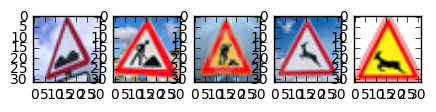

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

from PIL import Image

imgx0 = Image.open('5.jpg').resize((32, 32), Image.ANTIALIAS)  # Bumpy rod
imgx1 = Image.open('6.jpg').resize((32, 32), Image.ANTIALIAS)  # Road work
imgx2 = Image.open('7.jpg').resize((32, 32), Image.ANTIALIAS)  # Road work
imgx3 = Image.open('9.jpg').resize((32, 32), Image.ANTIALIAS)  # Wild animal crossing
imgx4 = Image.open('10.jpg').resize((32, 32), Image.ANTIALIAS) # Wild animal crossing

f , AXS = plt.subplots(1, 5, sharex='col' ,figsize=(5,5))

AXS[0].imshow(imgx0)
AXS[1].imshow(imgx1)
AXS[2].imshow(imgx2)
AXS[3].imshow(imgx3)
AXS[4].imshow(imgx4)

X_web = [imgx0,imgx1,imgx2,imgx3,imgx4]
y_web = [22 ,25, 25, 31, 31]

X_web_normalized = []
y_web_normalized = []
for i in range(len(X_web)):
    norm = feature_normalize(X_web[i])
    X_web_normalized.append(norm)
    y_web_normalized.append(y_web[i])
    
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    accuracy0 = evaluate([X_web_normalized[0]], [y_web_normalized[0]])
    accuracy1 = evaluate([X_web_normalized[1]], [y_web_normalized[1]])
    accuracy2 = evaluate([X_web_normalized[2]], [y_web_normalized[2]])
    accuracy3 = evaluate([X_web_normalized[3]], [y_web_normalized[3]])
    accuracy4 = evaluate([X_web_normalized[4]], [y_web_normalized[4]])
        
    print (accuracy0,accuracy1,accuracy2,accuracy3,accuracy4)
    
    test_accuracy = evaluate(X_web_normalized, y_web_normalized)
    print("Test Accuracy = {:.3f}".format(test_accuracy))   

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

**The model accuracy is 60% in this case. The model classified images 1,2,3 correctly. For image 1 and 3 I would expect that because they look like normal images and similar to the training samples. For image 2, "Road work" with different color,the model classified correctly, which I was not sure and wanted to see how it does. Image 0 has a sharp angle and is misclassified. In different runs with the same parameters, image 0 was classified correctly sometimes. Image 4 has a different shape of animal and also different coloring and is misclassified. **

**The performance is not close to test data set but regarding the very different number of samples in 2 cases, I did not expect to get close numbers.**

**The accuracy for test set is 93.4% which is lower than validation accuracy by about 6%. This can be because of model overfitting and/or different images in test set which were not included in training set to be learned by the model.**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
logits1 = LeNet(x)


with tf.Session() as sess: 
    sess.run(tf.initialize_all_variables())    
    ls = sess.run(logits1 , feed_dict={x:X_web_normalized})
    sm = sess.run(tf.nn.softmax(ls))    
    tops= sess.run(tf.nn.top_k(sm, k=5))  
       
print(tops)    

TopKV2(values=array([[ 0.03771886,  0.03630441,  0.03355118,  0.03010137,  0.02984951],
       [ 0.03402466,  0.03237901,  0.03165933,  0.02822368,  0.02776086],
       [ 0.03340396,  0.03067515,  0.03062325,  0.02887319,  0.02722328],
       [ 0.03003834,  0.029813  ,  0.02861731,  0.02760387,  0.02757072],
       [ 0.03526185,  0.03408569,  0.0327693 ,  0.03052852,  0.02943111]], dtype=float32), indices=array([[23, 39,  4, 10, 18],
       [23, 13, 10,  9, 42],
       [19, 32, 14,  4, 13],
       [20,  4, 34, 36, 33],
       [ 0, 32, 15,  8,  4]], dtype=int32))


<Container object of 5 artists>

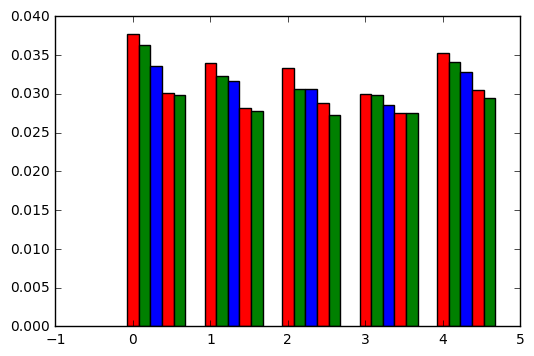

In [15]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
fig, ax = plt.subplots()    
    
ax.bar([ b+0 for b in range(len(tops[0])) ],  [a[0] for a in tops[0]] , align='center' , color='r' ,width=.15)  
ax.bar([ b+.15 for b in range(len(tops[0])) ], [a[1] for a in tops[0]] , align='center'  , color='g' , width=.15) 
ax.bar([ b+.3 for b in range(len(tops[0])) ], [a[2] for a in tops[0]] , align='center'  , color='b' , width=.15) 
ax.bar([ b+.45 for b in range(len(tops[0])) ], [a[3] for a in tops[0]] , align='center'  , color='r' , width=.15) 
ax.bar([ b+.6 for b in range(len(tops[0])) ], [a[4] for a in tops[0]] , align='center'  , color='g' , width=.15) 

**Answer:**

** Image 0: misclassified and the correct prediction is not in top 5**

** Image 1: classified correctly. The probability of the prediction is 5% higher than the next probability which is good**

** Image 2: classified correctly. The probability of the prediction is 8% higher than the next probability which is good**

** Image 3: classified correctly. The probability of the prediction is .6% higher than the next probability which is uncertain**

** Image 4: misclassified and the correct prediction is not in top 5**



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.